In [1]:
"import numpy as np", 
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
def std_col_name(name):
	name = name.strip()
	name = re.sub(r"\s+", "_", name)
	name = re.sub(r"[^$/\w]", "", name)
	return name.lower()

std_col_name("  PATRIMONIO /#$&% ATIVOS  ")

'patrimonio_/$_ativos'

- [ x ] Dar pontos positivos ou negativos para cada coluna da empresa
- [ x ] Rankear ações pela melhor pontuação geral
- [ ] Rankear FIIs da mesm forma
- [ ] Avaliar historicamente se investir ns top 15 desse ranking traz bons resultados
- [ ] Adicionar metricas historicas (evolucao de preco, distribuicao de dividendos, etc)
- [ ] Adicionar modelo Black & Scholes
- [ ] Adicionar fontes de dados independentes do Status Invest
- [ ] Adicionar metadados (setor da acao, vantagem competiiva, gestao boa, etc)
- [ ] !!!! Adicionar método que faz top 20 de cada coluna e dá 1 ponto pra cada carcterística TOP


In [3]:
br_stocks = pd.read_csv("acoes_brasil.csv", sep=";", decimal=",", thousands='.') #.fillna(0)
stocks_col_names = [std_col_name(name) for name in br_stocks.columns]
br_stocks.columns = stocks_col_names

br_stocks[["dy"]] = br_stocks[["dy"]].fillna(0)

print(br_stocks.columns)
# print(br_stocks.dtypes)
br_stocks.head()

Index(['ticker', 'preco', 'dy', 'p/l', 'p/vp', 'p/ativos', 'margem_bruta',
       'margem_ebit', 'marg_liquida', 'p/ebit', 'ev/ebit',
       'divida_liquida_/_ebit', 'div_liq_/_patri', 'psr', 'p/cap_giro',
       'p_at_cir_liq', 'liq_corrente', 'roe', 'roa', 'roic',
       'patrimonio_/_ativos', 'passivos_/_ativos', 'giro_ativos',
       'cagr_receitas_5_anos', 'cagr_lucros_5_anos', 'liquidez_media_diaria',
       'vpa', 'lpa', 'peg_ratio', 'valor_de_mercado'],
      dtype='object')


,ticker,preco,dy,p/l,p/vp,p/ativos,margem_bruta,margem_ebit,marg_liquida,p/ebit,...,patrimonio_/_ativos,passivos_/_ativos,giro_ativos,cagr_receitas_5_anos,cagr_lucros_5_anos,liquidez_media_diaria,vpa,lpa,peg_ratio,valor_de_mercado
0,AALR3,10.41,0.00,-4.30,1.42,0.49,30.29,-1.09,-25.30,-99.75,...,0.34,0.65,0.45,0.13,NaN,1.898619e+06,7.32,-2.42,-0.01,1.231428e+09
1,ABCB4,19.86,6.07,5.71,0.83,0.08,31.62,25.25,19.35,4.38,...,0.10,0.90,0.07,18.70,12.95,1.226095e+07,23.98,3.48,0.39,4.490150e+09
2,ABEV3,12.98,5.86,14.34,2.41,1.54,49.95,21.50,17.26,11.52,...,0.64,0.35,0.62,10.72,14.46,3.329247e+08,5.40,0.91,2.64,2.047998e+11
3,ADHM3,1.56,0.00,-4.09,-1.29,105.12,100.00,-13548.48,-18860.61,-5.69,...,-81.72,82.72,0.14,NaN,NaN,NaN,-1.21,-0.38,-0.58,2.543977e+07
4,AERI3,0.81,0.00,-5.82,0.74,0.20,13.03,9.37,-3.59,2.23,...,0.27,0.73,0.93,NaN,NaN,6.355384e+06,1.10,-0.14,0.00,6.206329e+08


In [4]:
def percentage_str_to_float(x):
	# print("el: '", x, "'")
	x = re.sub(r"^\s*$", "N/A", x)
	x = x.strip("%").replace(",", ".")
	if x == "N/A":
		return None
	return float(x) / 100

converters = {}
percentage_cols = ["DIVIDEND YIELD", "DY (12M) ACUMULADO", "DY (12M) MÉDIA", "VARIAÇÃO PREÇO", "DY PATRIMONIAL", "VARIAÇÃO PATRIMONIAL"]
for col in percentage_cols:
	converters[col] = percentage_str_to_float
	# print(col, fiis_df[col].dtype)
	# fiis_df[col] = fiis_df[col].apply(percentage_str_to_float)

fiis_df = pd.read_csv("fiis.csv", sep=",", decimal=",", thousands=".", converters=converters)

fiis_col_names = [std_col_name(name) for name in fiis_df.columns]
fiis_df.columns = fiis_col_names
fiis_df.rename(columns={"dividend_yield": "dy"}, inplace = True)
br_stocks[["dy"]] = br_stocks[["dy"]].fillna(0)

print(fiis_df.columns)
print(fiis_df.dtypes)
fiis_df.head()

Index(['ticker', 'setor', 'liquidez_diária_r$', 'p/vp', 'dy',
       'dy_12m_acumulado', 'dy_12m_média', 'variação_preço',
       'patrimônio_líquido', 'p/vpa', 'dy_patrimonial', 'variação_patrimonial',
       'quant_ativos', 'num_cotistas'],
      dtype='object')
ticker                   object
setor                    object
liquidez_diária_r$      float64
p/vp                    float64
dy                      float64
dy_12m_acumulado        float64
dy_12m_média            float64
variação_preço          float64
patrimônio_líquido      float64
p/vpa                   float64
dy_patrimonial          float64
variação_patrimonial    float64
quant_ativos            float64
num_cotistas            float64
dtype: object


,ticker,setor,liquidez_diária_r$,p/vp,dy,dy_12m_acumulado,dy_12m_média,variação_preço,patrimônio_líquido,p/vpa,dy_patrimonial,variação_patrimonial,quant_ativos,num_cotistas
0,AAZQ11,INDEFINIDO,658092.68,0.96,0.0131,0.1341,0.0149,-0.0245,2.273157e+08,0.96,0.0127,0.0000,0.0,19556.0
1,ABCP11,SHOPPINGS,43186.82,0.75,0.0087,0.0914,0.0076,0.0286,4.324652e+08,0.75,0.0065,0.0002,1.0,17587.0
2,AFHI11,PAPÉIS,1179377.89,1.01,0.0107,0.1304,0.0109,0.0022,3.178651e+08,1.01,0.0110,0.0012,0.0,25035.0
3,AGRX11,OUTROS,233347.32,NaN,0.0138,0.1656,0.0138,0.0150,NaN,NaN,NaN,NaN,0.0,0.0
4,AIEC11,LAJES CORPORATIVAS,623349.32,0.59,0.0132,0.1392,0.0116,-0.1216,4.578679e+08,0.59,0.0080,0.0149,2.0,15900.0


In [5]:
points_df = pd.DataFrame()

feature_to_green_flag_filter = {
	"p/l": {"min_val": 3, "max_val": 20},
	"dy": {"min_val": 5, "max_val": 20},
	"p/vp": {"min_val": 0.5, "max_val": 3},
	"margem_bruta": {"min_val": 5, "max_val": 100},
	"marg_liquida": {"min_val": 5, "max_val": 100},
	"roa": {"min_val": 5, "max_val": 100},
	"roe": {"min_val": 5, "max_val": 100},
	"roic": {"min_val": 5, "max_val": 100},
}

filtered_br_stocks = br_stocks
for feature_name, filter_info in feature_to_green_flag_filter.items():
	# step 1
	min_val = filter_info["min_val"]
	min_filter = (filtered_br_stocks[feature_name] > min_val)

	filtered_step_1 = filtered_br_stocks[min_filter]

	# step 2
	max_val = filter_info["max_val"]
	max_filter = (filtered_step_1[feature_name] < max_val)

	filtered_step_2 = filtered_step_1[max_filter]

	# end
	filtered_br_stocks = filtered_step_2

filtered_br_stocks.head()

,ticker,preco,dy,p/l,p/vp,p/ativos,margem_bruta,margem_ebit,marg_liquida,p/ebit,...,patrimonio_/_ativos,passivos_/_ativos,giro_ativos,cagr_receitas_5_anos,cagr_lucros_5_anos,liquidez_media_diaria,vpa,lpa,peg_ratio,valor_de_mercado
2,ABEV3,12.98,5.86,14.34,2.41,1.54,49.95,21.50,17.26,11.52,...,0.64,0.35,0.62,10.72,14.46,3.329247e+08,5.40,0.91,2.64,2.047998e+11
7,AGRO3,28.70,11.28,10.97,1.34,0.84,30.76,21.55,20.98,10.68,...,0.63,0.37,0.36,27.22,16.28,2.091782e+07,21.40,2.62,-0.23,2.947015e+09
36,AURE3,13.89,10.79,4.49,0.94,0.42,21.03,27.60,52.70,8.57,...,0.45,0.55,0.18,NaN,NaN,4.464009e+07,14.79,3.10,0.00,1.390000e+10
133,CEBR3,16.30,9.15,6.24,1.17,0.83,43.45,84.65,66.35,4.89,...,0.71,0.11,0.20,-34.71,7.64,1.211046e+05,13.92,2.61,-4.51,1.212181e+09
134,CEBR5,16.44,9.07,6.29,1.18,0.84,43.45,84.65,66.35,4.93,...,0.71,0.11,0.20,-34.71,7.64,6.773393e+04,13.92,2.61,-4.55,1.212181e+09


In [6]:
def generate_point_col(stock_df, col_name): #, min_val, max_val):
	col_series = stock_df[col_name]

	# mean_val = col_series.mean()
	# std_dev = col_series.std()
	median_val = col_series.median()
	first_quarter = col_series.quantile(0.25)
	third_quarter = col_series.quantile(0.75)

	quarter_dist = third_quarter - first_quarter

	std_foo = (lambda x : abs(x[col_name] - median_val) / quarter_dist)
	ascending_std_foo = (lambda x : -std_foo(x))

	std_vals_series = stock_df.apply(ascending_std_foo, axis=1)
	lowest_val = std_vals_series.min()

	def calculate_points(x):
		standardized_val = std_foo(x)

		is_low_outlier = standardized_val <= first_quarter - 1.5 * quarter_dist
		is_high_outlier = standardized_val >= third_quarter + 1.5 * quarter_dist
		if is_low_outlier or is_high_outlier:
			standardized_val = -lowest_val # crazy negative ops, dont ask why

		return -standardized_val

	point_col_name = "generic_point_" + col_name

	col_df = col_series.to_frame()
	col_df[point_col_name] = col_df.apply(calculate_points, axis=1)
	col_df["ticker"] = stock_df["ticker"]

	return col_df[[point_col_name]]  # [["ticker", point_col_name]]

	# filtered_df = col_df[ (col_df > min_val) & (col_df < max_val) ].sort_values(by=col_name).head(50)
	# top_tickers = set(filtered_df["ticker"].unique())
	# print(top_tickers)
	
	# return col_df.apply(lambda x : 2 if x["ticker"] in top_tickers else 0, axis=1)


In [7]:
def generate_point_col_with_rank(stock_df, feature_name, filter_dict, red_flag_filters):
	# col_series = stock_df[col_name]

	# feature_name = filter_dict[0]
	min_val = filter_dict["min_val"]
	max_val = filter_dict["max_val"]
	the_bigger_the_better = filter_dict["the_bigger_the_better"]

	lower_tolerable_limit = red_flag_filters["lower_tolerable_limit"]
	upper_tolerable_limit = red_flag_filters["upper_tolerable_limit"]
	# the_bigger_the_better_red_flag = red_flag_filters["the_bigger_the_better"]
	
	should_order_ascending = not the_bigger_the_better

	# green points
	filters_green_flag = ((stock_df[feature_name] >= min_val) & (stock_df[feature_name] <= max_val))
	filtered_green_stock_df = stock_df[filters_green_flag].sort_values(by=feature_name, ascending=should_order_ascending).head(25)
	filtered_green_flag_stock_names = set(filtered_green_stock_df["ticker"])

	calculate_green_points = (lambda x : 1 if x["ticker"] in filtered_green_flag_stock_names else 0)
	green_point_col_name = "green_point_" + feature_name
	stock_df[green_point_col_name] = stock_df.apply(calculate_green_points, axis=1)

	# red points
	filters_red_flag = ((stock_df[feature_name] > upper_tolerable_limit) | (stock_df[feature_name] < lower_tolerable_limit))
	filtered_red_stock_df = stock_df[filters_red_flag]
	filtered_red_flag_stock_names = set(filtered_red_stock_df["ticker"])

	calculate_red_points = (lambda x : -1 if x["ticker"] in filtered_red_flag_stock_names else 0)
	red_point_col_name = "red_point_" + feature_name
	stock_df[red_point_col_name] = stock_df.apply(calculate_red_points, axis=1)


	return stock_df[[green_point_col_name, red_point_col_name]]


In [8]:
filter_green_flag_tuples = (
	("p/l", 3, 20, False),
	("dy", 0.05, 0.2, True),
	("p/vp", 0.5, 3, False),
	("margem_bruta", 5, 100, True),
	("marg_liquida", 5, 100, True),
	("roa", 5, 100, True),
	("roe", 5, 100, True),
	("roic", 5, 100, True),
	("liquidez_diária_r$", 10 ** 5, 10 ** 12, True),
	("dy_12m_acumulado", 0.05, 0.2, True),
	# ("dy_12m_média", 5 / 12, 20 / 12, True),
	("quant_ativos", 4, 1000, True),
	("num_cotistas", 1000, 10 ** 9, True)
)

feature_to_green_flag_filter = {}

for filter_tuple in filter_green_flag_tuples:
	feature_name, min_val, max_val, the_bigger_the_better = filter_tuple

	feature_to_green_flag_filter[feature_name] = {
		"min_val": min_val,
		"max_val": max_val,
		"the_bigger_the_better": the_bigger_the_better
	}

In [9]:
filter_red_flag_tuples = (
	("p/l", 1, 30, False),
	("dy", -0.001, 0.25, True),
	("p/vp", 0.4, 1.5, False), # just for fiis
	("margem_bruta", 4, 101, True),
	("marg_liquida", 4, 101, True),
	("roa", 4, 101, True),
	("roe", 4, 101, True),
	("roic", 4, 101, True),
	("liquidez_diária_r$", 50 ** 4, 10 ** 13, True),
	("dy_12m_acumulado", 0.04, 0.21, True),
	("dy_12m_média", 0.04 / 12, 0.21 / 12, True), # redundant
	("quant_ativos", 0, 10 ** 10, True),
	("num_cotistas", 999, 10 ** 10, True)
)

feature_to_red_flag_filter = {}

for filter_tuple in filter_red_flag_tuples:
	feature_name, lower_tolerable_limit, upper_tolerable_limit, the_bigger_the_better = filter_tuple

	feature_to_red_flag_filter[feature_name] = {
		"lower_tolerable_limit": lower_tolerable_limit,
		"upper_tolerable_limit": upper_tolerable_limit,
		"the_bigger_the_better": the_bigger_the_better
	}

In [10]:
points_df = pd.DataFrame()

br_stocks_col_names = set(br_stocks.columns)
feature_names_that_have_green_filter = set(feature_to_green_flag_filter.keys())
feature_names_that_have_red_filter = set(feature_to_red_flag_filter.keys())

filtered_br_stocks = br_stocks
for feature_name, filter_info in feature_to_green_flag_filter.items():
	if feature_name not in br_stocks_col_names or feature_name not in feature_names_that_have_green_filter:
		continue

	# step 1
	min_val = filter_info["min_val"]
	min_filter = (filtered_br_stocks[feature_name] > min_val)

	filtered_step_1 = filtered_br_stocks[min_filter]

	# step 2
	max_val = filter_info["max_val"]
	max_filter = (filtered_step_1[feature_name] < max_val)

	filtered_step_2 = filtered_step_1[max_filter]

	# end
	filtered_br_stocks = filtered_step_2

filtered_br_stocks.head(5)

,ticker,preco,dy,p/l,p/vp,p/ativos,margem_bruta,margem_ebit,marg_liquida,p/ebit,...,patrimonio_/_ativos,passivos_/_ativos,giro_ativos,cagr_receitas_5_anos,cagr_lucros_5_anos,liquidez_media_diaria,vpa,lpa,peg_ratio,valor_de_mercado


In [36]:
feature_col_names = br_stocks.columns[2:]  # exclude tickers and price
df_points = pd.DataFrame()
df_points_generic = pd.DataFrame()

br_stocks_col_names = set(br_stocks.columns)

print("br_stocks_col_names ", br_stocks_col_names)
print("feature_names_that_have_green_filter ", feature_names_that_have_green_filter)
print("feature_names_that_have_red_filter ", feature_names_that_have_red_filter)
print("ticker in set ? ", ("ticker" in br_stocks_col_names))
print("dy in set ? ", ("dy" in br_stocks_col_names))

# filtered_br_stocks = br_stocks
for col_name in feature_col_names:
	col_not_in_stocks = (col_name not in br_stocks_col_names)
	col_not_in_filters = (col_name not in feature_names_that_have_green_filter)
	col_not_in_red_filters = (col_name not in feature_names_that_have_red_filter)

	# print("col_name: ", col_name)
	# print("feature_not_in_stocks: ", col_not_in_stocks)
	# print("feature_not_in_filters: ", col_not_in_filters)
	# df_points["point_" + col_name] = generate_point_col(br_stocks, col_name) 

	if col_not_in_stocks or col_not_in_filters or col_not_in_red_filters:
		continue

	filter_dict = feature_to_green_flag_filter[col_name]
	red_flag_filters = feature_to_red_flag_filter[col_name]

	df_points_generic[["generic_point_" + col_name]] = generate_point_col(br_stocks, col_name)
	df_points[["green_point_" + col_name, "red_point_" + col_name]] = generate_point_col_with_rank(br_stocks, col_name, filter_dict, red_flag_filters) 
	# .sort_values(by="point_p/l", ascending=False).head(25)
df_points["ticker"] = br_stocks["ticker"]
# print(df_points.iloc[:, 0:-2])
# print(sum(df_points.iloc[:, 0:-2]))
df_points["total_points"] = df_points.iloc[:, 0:-1].sum(axis=1) # sum all float cols
df_points_generic["total_generic_points"] = df_points_generic.iloc[:, 0:-1].sum(axis=1) # sum all float cols

df_all_points = pd.merge(df_points, df_points_generic, left_index=True, right_index=True, suffixes=[None, "_deleteme"])
df_all_points = pd.merge(df_all_points, br_stocks, left_index=True, right_index=True, suffixes=[None, "_deleteme"])

df_all_points["p/l"] = br_stocks["p/l"]
df_all_points["dy"] = br_stocks["dy"]

stocks_rank = df_all_points.sort_values(by=["total_points", "dy", "total_generic_points"], ascending=False)

stocks_rank.head(20) # [["ticker", "dy", "p/l", "point_dy", "point_p/l", "total_points"]]
stocks_rank.head(20)[["ticker", "dy", "p/l", "total_points", "total_generic_points"]]

br_stocks_col_names  {'red_point_roic', 'green_point_margem_bruta', 'giro_ativos', 'liquidez_media_diaria', 'roa', 'red_point_marg_liquida', 'roe', 'red_point_margem_bruta', 'marg_liquida', 'dy', 'p/vp', 'red_point_roa', 'ticker', 'normalised_p/vp', 'green_point_p/vp', 'vpa', 'margem_ebit', 'valor_de_mercado', 'patrimonio_/_ativos', 'psr', 'point_1', 'normalised_margem_bruta', 'peg_ratio', 'p/ativos', 'cagr_receitas_5_anos', 'red_point_p/vp', 'green_point_roe', 'p/cap_giro', 'green_point_dy', 'red_point_dy', 'green_point_marg_liquida', 'point_sum', 'red_point_p/l', 'normalised_p/l', 'p_at_cir_liq', 'margem_bruta', 'roic', 'point_4', 'preco', 'cagr_lucros_5_anos', 'p/ebit', 'ev/ebit', 'point_3', 'green_point_roic', 'point_2', 'normalised_dy', 'normalised_marg_liquida', 'red_point_roe', 'lpa', 'passivos_/_ativos', 'divida_liquida_/_ebit', 'div_liq_/_patri', 'liq_corrente', 'green_point_roa', 'green_point_p/l', 'p/l'}
feature_names_that_have_green_filter  {'liquidez_diária_r$', 'margem_br

,ticker,dy,p/l,total_points,total_generic_points
582,TRPN3,0.00,0.44,3,-21.466875
89,BRAP4,13.41,3.12,2,-7.962642
235,ELPL3,0.00,1.00,2,-3.809657
281,G2DI33,0.00,3.12,2,-8.262135
224,EEEL3,0.00,3.39,2,-8.993904
88,BRAP3,13.22,2.88,1,-7.907724
353,LEVE3,10.64,7.44,1,-8.765798
360,LOGG3,4.79,8.71,1,-8.901827
121,CAMB4,3.18,3.47,1,-5.242332
549,SUZB3,3.07,3.33,1,-7.872875


In [12]:
br_stocks.describe()

,preco,dy,p/l,p/vp,p/ativos,margem_bruta,margem_ebit,marg_liquida,p/ebit,ev/ebit,...,green_point_margem_bruta,red_point_margem_bruta,green_point_marg_liquida,red_point_marg_liquida,green_point_roe,red_point_roe,green_point_roa,red_point_roa,green_point_roic,red_point_roic
count,620.000000,620.000000,620.000000,617.000000,6.200000e+02,589.000000,589.000000,589.000000,620.000000,613.000000,...,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000
mean,53.075258,8.388113,86.978871,199.383485,4.463253e+03,-15.040136,3.978387,51.060119,19.461532,15.403165,...,0.040323,-0.064516,0.040323,-0.420968,0.040323,-0.400000,0.040323,-0.567742,0.040323,-0.304839
std,493.399564,112.790911,1982.634115,6144.542181,1.110515e+05,452.326729,1023.402581,1180.622168,190.299765,183.033929,...,0.196874,0.245868,0.196874,0.494113,0.196874,0.490294,0.196874,0.495790,0.196874,0.460711
min,0.000000,0.000000,-4029.370000,-30200.650000,0.000000e+00,-4128.220000,-18852.940000,-18860.610000,-707.650000,-719.570000,...,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000
25%,4.615000,0.000000,0.000000,0.510000,1.575000e-01,19.730000,4.750000,0.370000,0.422500,1.560000,...,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000
50%,11.225000,0.615000,6.320000,1.060000,4.000000e-01,31.520000,13.610000,7.080000,4.310000,6.410000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
75%,25.252500,4.712500,12.510000,1.990000,8.500000e-01,46.970000,25.250000,17.710000,8.867500,11.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11091.730000,2762.620000,48754.690000,149535.600000,2.765162e+06,101.460000,6032.010000,13896.670000,3576.720000,3586.400000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000


In [37]:
feature_col_names = fiis_df.columns[2:]  # exclude tickers and sector
df_points = pd.DataFrame()
df_points_generic = pd.DataFrame()

fiis_df_col_names = set(fiis_df.columns)

print("fiis_df_col_names ", fiis_df_col_names)
print("feature_names_that_have_green_filter ", feature_names_that_have_green_filter)
print("ticker in set ? ", ("ticker" in fiis_df_col_names))
print("dy in set ? ", ("dy" in fiis_df_col_names))

# filtered_fiis_df = fiis_df
for col_name in feature_col_names:
	col_not_in_stocks = (col_name not in fiis_df_col_names)
	col_not_in_filters = (col_name not in feature_names_that_have_green_filter)
	col_not_in_red_filters = (col_name not in feature_names_that_have_red_filter)

	if col_not_in_stocks or col_not_in_filters or col_not_in_red_filters:
		continue

	filter_dict = feature_to_green_flag_filter[col_name]
	red_flag_filters = feature_to_red_flag_filter[col_name]

	df_points_generic[["generic_point_" + col_name]] = generate_point_col(fiis_df, col_name)
	df_points[["green_point_" + col_name, "red_point_" + col_name]] = generate_point_col_with_rank(fiis_df, col_name, filter_dict, red_flag_filters) 
	# .sort_values(by="point_p/l", ascending=False).head(25)
df_points["ticker"] = fiis_df["ticker"]
# print(df_points.iloc[:, 0:-2])
# print(sum(df_points.iloc[:, 0:-2]))
df_points["total_points"] = df_points.iloc[:, 0:-1].sum(axis=1) # sum all float cols
df_points_generic["total_generic_points"] = df_points_generic.iloc[:, 0:-1].sum(axis=1) # sum all float cols

df_points["dy"] = fiis_df["dy"]
df_points["dy_12m_acumulado"] = fiis_df["dy_12m_acumulado"]

df_all_points = pd.merge(df_points, fiis_df, left_index=True, right_index=True, suffixes=[None, "_deleteme"])
df_all_points = pd.merge(df_all_points, df_points_generic, left_index=True, right_index=True, suffixes=[None, "_deleteme"])

fiis_rank = df_all_points.sort_values(by=["total_points", "dy", "total_generic_points"], ascending=False)

fiis_rank.head(20) [["ticker", "setor", "dy", "quant_ativos", "dy_12m_acumulado", "red_point_dy_12m_acumulado", "total_points", "total_generic_points"]]

fiis_df_col_names  {'patrimônio_líquido', 'red_point_liquidez_diária_r$', 'dy_12m_acumulado', 'quant_ativos', 'dy', 'p/vp', 'ticker', 'green_point_p/vp', 'liquidez_diária_r$', 'red_point_quant_ativos', 'red_point_num_cotistas', 'red_point_p/vp', 'setor', 'dy_patrimonial', 'green_point_dy', 'variação_preço', 'red_point_dy', 'green_point_liquidez_diária_r$', 'num_cotistas', 'green_point_dy_12m_acumulado', 'dy_12m_média', 'p/vpa', 'green_point_quant_ativos', 'red_point_dy_12m_acumulado', 'variação_patrimonial', 'green_point_num_cotistas'}
feature_names_that_have_green_filter  {'liquidez_diária_r$', 'margem_bruta', 'roic', 'roa', 'dy_12m_acumulado', 'num_cotistas', 'roe', 'quant_ativos', 'marg_liquida', 'dy', 'p/vp', 'p/l'}
ticker in set ?  True
dy in set ?  True


KeyError: "['quant_ativosdy_12m_acumulado'] not in index"

In [14]:
# br_stocks.apply(lambda x : x[ x["p/l"] > 3 ].sort_values(by="p/l").head(20))
top_equity_df = br_stocks[ (br_stocks["p/l"] > 3) & (br_stocks["p/l"] < 20) ].sort_values(by="p/l").head(50)
top_equity_tickers = set(top_equity_df["ticker"].unique())
print(top_equity_tickers)
# print(top_equity_df)
br_stocks["point_1"] = br_stocks.apply(lambda x : 2 if x["ticker"] in top_equity_tickers else 0, axis=1)

top_dy_df = br_stocks[ (br_stocks["dy"] > 5) & (br_stocks["dy"] < 20) ]
top_dy_tickers = set(top_dy_df["ticker"].unique())
print(top_dy_tickers)
# print(top_dy_df)
br_stocks["point_2"] = br_stocks.apply(lambda x : 0.5 if x["ticker"] in top_dy_tickers else 0, axis=1)

top_pvp_df = br_stocks[ (br_stocks["p/vp"] > 0) & (br_stocks["p/vp"] < 2) ]
top_pvp_tickers = set(top_pvp_df["ticker"].unique())
print(top_pvp_tickers)
# print(top_pvp_df)
br_stocks["point_3"] = br_stocks.apply(lambda x : 1 if x["ticker"] in top_pvp_tickers else 0, axis=1)

top_net_margin_df = br_stocks[ (br_stocks["marg_liquida"] > 10) & (br_stocks["marg_liquida"] < 100) ]
top_net_margin_tickers = set(top_net_margin_df["ticker"].unique())
print(top_net_margin_tickers)
# print(top_net_margin_df)
br_stocks["point_4"] = br_stocks.apply(lambda x : 1 if x["ticker"] in top_net_margin_tickers else 0, axis=1)

top_gross_margin_df = br_stocks[ (br_stocks["margem_bruta"] > 10) & (br_stocks["margem_bruta"] < 100) ]
top_gross_margin_tickers = set(top_gross_margin_df["ticker"].unique())
print(top_gross_margin_tickers)
# print(top_gross_margin_df)
br_stocks["point_4"] = br_stocks.apply(lambda x : 1 if x["ticker"] in top_gross_margin_tickers else 0, axis=1)

br_stocks["point_sum"] = sum([br_stocks["point_%d" % i] for i in range(1, 5)])

{'BNBR3', 'HAGA3', 'FIGE3', 'COCE5', 'EEEL4', 'EPAR3', 'PETR3', 'AURE3', 'CGRA3', 'VALE3', 'CTKA3', 'JALL3', 'CTKA4', 'CMIG4', 'EUCA4', 'BBAS3', 'ALSO3', 'GOAU4', 'GGBR3', 'SAPR11', 'TIET11', 'CAMB3', 'MTSA4', 'SAPR3', 'TECN3', 'EUCA3', 'POSI3', 'PLAS3', 'ROMI3', 'CLSC3', 'HBTS5', 'CLSC4', 'CEDO3', 'NAFG4', 'EEEL3', 'GGBR4', 'CIEL3', 'SUZB3', 'BAZA3', 'CEDO4', 'BRAP4', 'NEOE3', 'G2DI33', 'SAPR4', 'MTRE3', 'MEAL3', 'GOAU3', 'PETR4', 'BMKS3', 'CAMB4'}
{'KEPL3', 'FESA4', 'CSMG3', 'MRFG3', 'ABCB4', 'CMIG4', 'TAEE4', 'ENBR3', 'TASA4', 'CSUD3', 'GOAU4', 'CSRN6', 'EVEN3', 'RANI3', 'SANB4', 'EQPA3', 'HBTS5', 'BRSR5', 'CEBR5', 'RPAD5', 'STBP3', 'CXSE3', 'EQPA5', 'SLCE3', 'TAEE3', 'ALUP3', 'ALUP11', 'GEPA4', 'LREN3', 'UNIP5', 'BBSE3', 'WIZC3', 'AURE3', 'CGRA3', 'ITSA3', 'UNIP3', 'TASA3', 'TKNO4', 'VIVT3', 'BRSR3', 'CPLE6', 'CGRA4', 'EMAE3', 'EUCA4', 'MELK3', 'BMIN3', 'ITSA4', 'GGBR3', 'POMO4', 'JBSS3', 'CEBR3', 'SAPR3', 'PORT3', 'BEES3', 'BEES4', 'ROMI3', 'GGBR4', 'ALUP4', 'CBAV3', 'CPLE3', 'RAP

In [15]:
br_stocks.sort_values(by="point_sum", ascending=False).head(15)

,ticker,preco,dy,p/l,p/vp,p/ativos,margem_bruta,margem_ebit,marg_liquida,p/ebit,...,red_point_roe,green_point_roa,red_point_roa,green_point_roic,red_point_roic,point_1,point_2,point_3,point_4,point_sum
310,HBTS5,50.00,5.80,3.81,0.80,0.32,89.64,133.89,118.82,3.38,...,0,0,0,0,0,2,0.5,1,1,4.5
157,CLSC4,63.23,5.15,3.98,0.76,0.21,15.14,9.03,5.98,2.64,...,0,0,0,0,0,2,0.5,1,1,4.5
46,BAZA3,89.02,5.99,4.00,0.91,0.12,29.18,53.10,34.41,2.59,...,0,0,-1,0,0,2,0.5,1,1,4.5
47,BBAS3,48.82,9.40,4.31,0.86,0.07,32.03,16.16,12.35,3.29,...,0,0,-1,0,0,2,0.5,1,1,4.5
512,SAPR4,4.72,7.90,5.23,0.79,0.40,60.18,34.84,23.19,3.48,...,0,0,0,0,0,2,0.5,1,1,4.5
511,SAPR3,4.62,7.35,5.11,0.77,0.39,60.18,34.84,23.19,3.40,...,0,0,0,0,0,2,0.5,1,1,4.5
510,SAPR11,23.76,7.74,5.24,0.79,0.40,60.18,34.84,23.19,3.48,...,0,0,0,0,0,2,0.5,1,1,4.5
498,ROMI3,11.70,8.43,4.74,0.95,0.48,32.50,17.85,14.09,3.74,...,0,0,0,0,0,2,0.5,1,1,4.5
75,BMKS3,318.99,18.12,5.40,0.73,0.63,26.67,51.94,153.94,16.01,...,0,0,0,0,-1,2,0.5,1,1,4.5
464,POSI3,6.67,7.62,4.50,0.69,0.25,28.20,13.05,5.62,1.94,...,0,0,0,0,0,2,0.5,1,1,4.5


['normalised_dy', 'normalised_p/l', 'normalised_p/vp', 'normalised_marg_liquida', 'normalised_margem_bruta']


<Axes: >

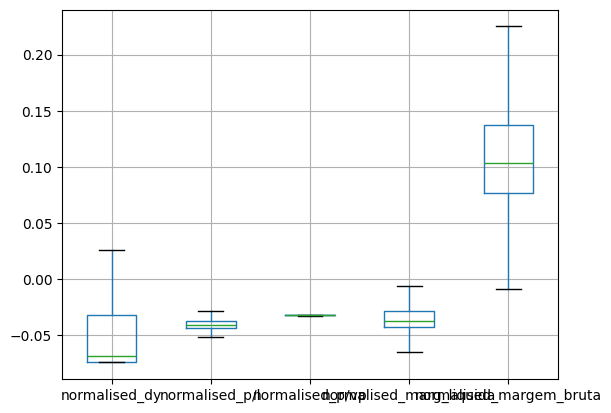

In [16]:
desired_cols = ["dy", "p/l", "p/vp", "marg_liquida", "margem_bruta"]
modified_cols = []

for col in desired_cols:
    new_col = "normalised_" + col
    modified_cols.append(new_col)
    
    col_vals = br_stocks[col]
    # print(col_vals, col_vals.mean(), col_vals.std())
    br_stocks[new_col] = ( col_vals - col_vals.mean() ) / col_vals.std()   

print(modified_cols)
# print(br_stocks)
br_stocks.boxplot(column=modified_cols, showfliers=False)